# Data-Driven Analysis of HIV Viral Load Status of Children and Adolescents (0-19 years) in South West Uganda: Insights and Recommendations
### The data analysis projected was completed by Edgar Obuluk

## 1.1 Introduction: 
The purpose of this project was to analyze HIV viral load data to extract valuable insights that could help improve on the delivery of HIV care and treatment services for children and adolescents in South West Uganda. Specifically, the analysis focuses on patient demographics, ART (antiretroviral therapy) regimen adherence, and viral load coverage and suppression. Additionally, this project identifies gaps in the HIV care program, particularly in relation to OVC (Orphans and Vulnerable Children) enrollment, ART regimen optimization, and Viral Load suppression.
## 1.2 Dataset Overview
The dataset contains information on data collected on HIV care and treatment services of children and adolescents in South West Uganda, including:

- Demographic data (e.g., age, district)
- ART regimen lines
- Viral load status
- OVC screening and enrollment 
- ART regimen optimization status

This dataset serves as the foundation for identifying patterns, trends, and potential issues in HIV care and treatment.

## 1.3 Importation and Initial Exploration of the Data
The first step was to load the dataset into Python and perform an initial examination of the data to understand its structure. This helped me in assessing the quality of the data, spotted any inconsistencies, and determined the next steps in cleaning and analysis.

Below is the Python code I used for Loading and Exploring Data:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loaded the data
file_path = '/Users/mac/Desktop/VL_Data.csv'
data = pd.read_csv(file_path)

# Viewed the first few rows
data.head()

#  Overview of the dataset#
# Checked column types and null values
data.info()

# Summary statistics for numeric and categorical data
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 24 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   District                                                                                                                         1165 non-null   object 
 1   Site                                                                                                                             1165 non-null   object 
 2   Sex                                                                                                                              1165 non-null   object 
 3   Age                                                                                               

,District,Site,Sex,Age,AgeCat,current_art_regimen_line,Current ART Regimen,Optimization,DTG Based,VL Updated_,...,Switched to 2nd line (Y/N/NE),"No. of IACs received i.e none, 1,2, 3, 4, 5, 6",IAC,If completed 3 IAC sessions. State date of HIVDRT sampling,TPT 1-Never initiated 2-On INH 3-Defaulted 4-Stopped due to SE 5- Completed,MMD (Months of ART refill at last visit),mmdmonths,MMD Received,Screened for OVC,Eligible and Enrolled in OVC
count,1165,1165,1165,1165.000000,1165,1102,1164,1164,1165,1165,...,132,73.000000,281,2,990,1148,1165.000000,1165,1165,1165
unique,5,13,2,NaN,2,6,17,2,2,3,...,5,NaN,2,2,5,33,NaN,6,5,3
top,Ibanda,Ruhoko HC IV,F,NaN,10-19yrs,1st,TDF/3TC/DTG,Opt,Yes,Not updated,...,N,NaN,No,04/03/2021,Completed,90,NaN,3 Months,Screened and Eligible,Eligible Linked and Enrolled
freq,485,152,666,NaN,742,721,567,1147,847,547,...,72,NaN,208,1,638,260,NaN,440,603,516
mean,NaN,NaN,NaN,11.488412,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.246575,NaN,NaN,NaN,NaN,7.001717,NaN,NaN,NaN
std,NaN,NaN,NaN,4.795571,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.996951,NaN,NaN,NaN,NaN,47.526625,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


### Key Observations
1. Column Names:
The dataset’s column names were inconsistent, with spaces and mixed cases. I standardized them by stripping extra spaces, converting to lowercase, and replacing spaces with underscores for easier access during analysis.

2. Data Types:
Some columns, such as MMD months, were incorrectly formatted as objects. I converted them to numeric types for accurate analysis. Categorical columns like current_art_regimen_line were properly recognized as objects for comparison.

3. Missing Data:
Several columns had missing data (e.g., 63 missing entries in current_art_regimen_line). I replaced placeholders like 'NE' with pd.NA for consistency and identified columns needing imputation or exclusion based on the amount of missing data.

## 1.4 Cleaning of the data
To ensure the dataset was ready for data analysis, I focused on cleaning and preprocessing tasks that addressed inconsistencies and missing data, and ensured the data types were correctly formatted for accurate analysis. The tasks included the following:

- Standardizing column names: The column names in the dataset contained inconsistencies such as spaces and mixed cases, which made it harder to work with. I standardized them by stripping extra spaces, converting all names to lowercase, and replacing spaces with underscores (e.g., changing VL Updated_ to vl_updated_ and MMD (Months of ART refill at last visit) to mmd_months).

- Handling missing data: I observed that some columns had missing values, often marked as 'NE' or blank fields. To ensure consistency, I replaced 'NE' with NaN, which allowed me to handle missing data more effectively during analysis.

- Converting data types: Certain columns, such as mmd_months, were incorrectly classified as object types rather than numeric. I converted these to numeric data types to facilitate accurate calculations and analysis, ensuring that values like age and months of ART refill could be properly analyzed.

These steps ensured that the dataset was clean, consistent, and ready for deeper analysis.

Below is the code I used for cleaning the data in Python: 









In [7]:
# Cleaning the dataset ##
# Step 1: Standardizing column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Replacing 'NE' and blanks with NaN for missing values
data = data.replace('NaN', pd.NA)

# Step 3: Converting relevant columns to numeric or categorical types
# Convert 'age' to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Convert MMD months to numeric
data['mmdmonths'] = pd.to_numeric(data['mmdmonths'], errors='coerce')

# Step 4: Check for missing values (count missing values in each column)
print(data.isnull().sum())


district                                                                                                                              0
site                                                                                                                                  0
sex                                                                                                                                   0
age                                                                                                                                   0
agecat                                                                                                                                0
current_art_regimen_line                                                                                                             63
current_art_regimen                                                                                                                   1
optimization                                    

## 1.5 Exploratory Data Analysis 
After cleaning the dataset, I conducted exploratory data analysis to uncover key patterns and distributions. This helped me in gaining insights into the data and developing a deeper understanding of patient characteristics and treatment outcomes.The Key areas I explored include the following:
- Age distribution
- ART regimen line distribution
- Viral load suppression

These analyses helped in identifying trends and gaps in treatment, which are valuable for program improvement and understanding patient outcomes more comprehensively.

### Age Distribution of Children and Adolescents living with HIV: 
- By examining the distribution of patient ages, I was able to understand the age demographic of the children and adolescents living with HIV. This helped in identifying trends in different age groups and understanding how age impacts treatment outcomes.
Below is the Python Code I used for visualizing the age distribution: 

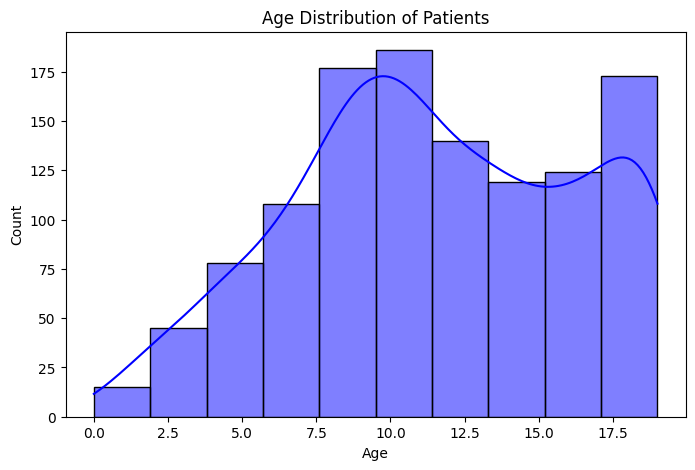

In [8]:
# Age Distribution of Patients
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### ART Regimen Line Distribution: 
- I explored which ART regimen lines (1st, 2nd, or 3rd) were most commonly used among the children and adolescents living with HIV. This insight was essential for assessing the level of treatment optimization across the different groups.

Below is the Python Code I used for visualizing the ART Regimen Line Distribution: 

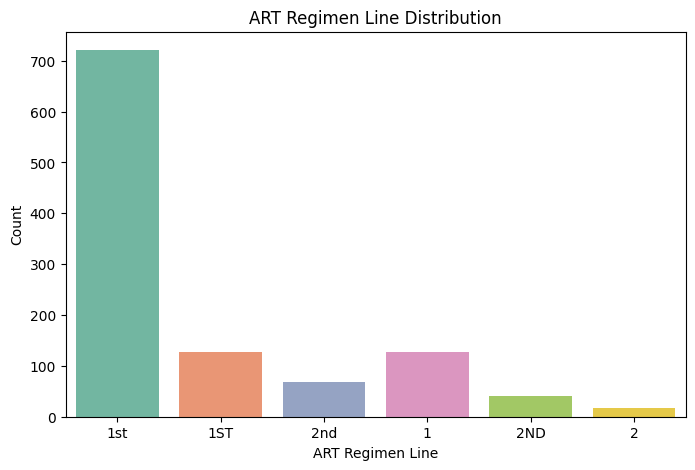

In [9]:
# ART Regimen Line Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='current_art_regimen_line', palette='Set2')
plt.title('ART Regimen Line Distribution')
plt.xlabel('ART Regimen Line')
plt.ylabel('Count')
plt.show()

### Viral Load Suppression: 
- The analysis on the proportion of children and adolescents with a suppressed viral load provided a critical measure of the effectiveness of HIV care and treatment. This analysis helped me assess the success of ART regimens in achieving viral load suppression.

Below is the Python Code I used for visualizing Viral Load Suppression:

VL Updated Counts:
 Yes             580
No              446
Not Eligible     41
Name: vl_updated_(y/n/ne), dtype: int64


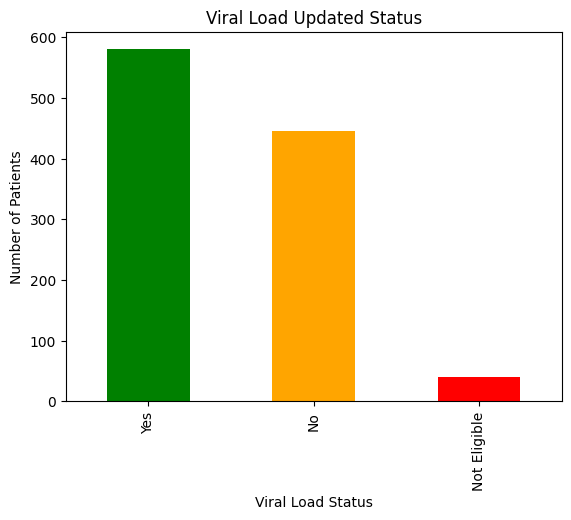

In [10]:
# Viral Load Updated Status
vl_updated_counts = data['vl_updated_(y/n/ne)'].value_counts()
print("VL Updated Counts:\n", vl_updated_counts)
vl_updated_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Viral Load Updated Status')
plt.xlabel('Viral Load Status')
plt.ylabel('Number of Patients')
plt.show()

## 1.6 Identifying Key Gaps and Trends
In this step, I focused on uncovering key gaps in patient care, ART regimen adherence, and treatment outcomes. By identifying specific issues, I was able to pinpoint areas where improvements could have a significant impact on patient health and program effectiveness. The gaps identified include the following: 
- Orphans and vulnerable children (OVC) enrollment gap
- Non-optimal ART regimens
- Non-suppressed viral load

### Orphans and Vulnerable Children (OVC) Enrollment Gap: 
I observed that while many children and adolescents living with HIV were eligible for the Orphans and Vulnerable Children (OVC) program, some of them had not yet enrolled. This gap points to an opportunity for better engagement and outreach to ensure that all children and adolescents who are eligible are enrolled and able to receive OVC services.

Below is the Python code for Orphans and Vulnerable Children (OVC) enrollment gap:

In [11]:
# Patients eligible but not enrolled in OVC programs
ovc_gap = data[(data['screened_for_ovc'] == 'Screened and Eligible') &
               (data['eligible_and_enrolled_in_ovc'] == 'NOT ENROLLED')]
print(f"Number of patients eligible but not enrolled in OVC: {len(ovc_gap)}")

Number of patients eligible but not enrolled in OVC: 244


### Non-Optimal ART Regimens: 
A significant number of patients were still on ART regimens that were not optimized for their condition. This could have affected the effectiveness of treatment and health outcomes, which highlighted the need for closer monitoring and timely regimen adjustments.

Below is the Python code for Non-optimal ART regimens:

In [12]:
# Patients not on optimal ART regimens
non_optimal = data[data['optimization'] != 'Opt']
print(f"Number of patients not on optimal ART regimens: {len(non_optimal)}")

Number of patients not on optimal ART regimens: 18


### Non-Suppresssed Viral Load: 
While many children and adolescents living with HIV adhered to their ART regimens, some still failed to achieve viral load suppression. This suggested potential issues with the regimen’s effectiveness or patient-specific factors, requiring further investigation and possible intervention strategies to improve viral control.

Below is the Python code for Non-suppressed Viral Load:

In [13]:
# Count of VL suppression
vl_suppression_counts = data['vl_suppression'].value_counts()
print("VL Suppression Counts:\n", vl_suppression_counts)

VL Suppression Counts:
 Suppressed         840
None suppressed    252
Not Eligible        72
Not Eligible         1
Name: vl_suppression, dtype: int64


## 1.7 Visualization of the Findings
To clearly communicate the findings from the analysis, I used visualizations to highlight key gaps and trends in the dataset.

### Visualization of Orphans and Vulnerable Children (OVC) Enrollment Gap:
I visualized the gap in OVC enrollment by district to understand the regional disparities. The bar chart below shows the number of children and adolescentsliving with HIV who were eligible but not enrolled in the program, revealing where further outreach and intervention was most needed.

Below is the Python code for the visualization of OVC enrollment gap:

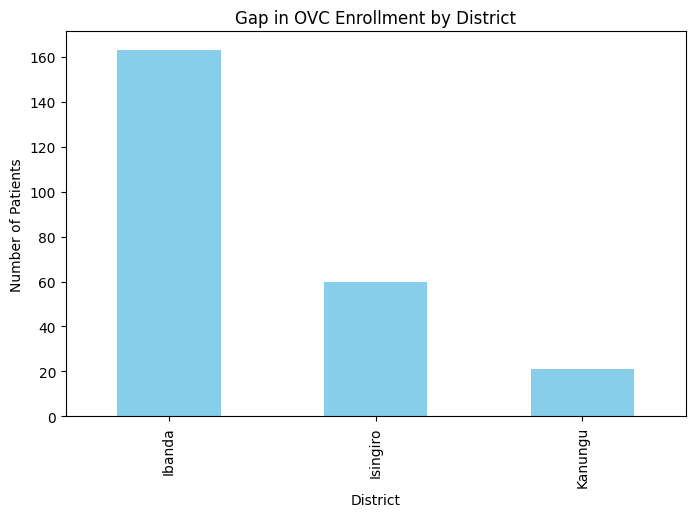

In [14]:
# Gap in OVC Enrollment
plt.figure(figsize=(8, 5))
ovc_gap['district'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gap in OVC Enrollment by District')
plt.xlabel('District')
plt.ylabel('Number of Patients')
plt.show()

### Visualization of Viral Load Suppression by ART Regimen Line:
I examined the relationship between ART regimen lines and VL suppression. This count plot showed the number of patients on each ART regimen line (1st, 2nd, 3rd) and their corresponding viral load suppression status. It also showed whether the current ART line correlated with viral suppression. 

Below is the Python code for the visualization of viral load suppression by ART regimen line:

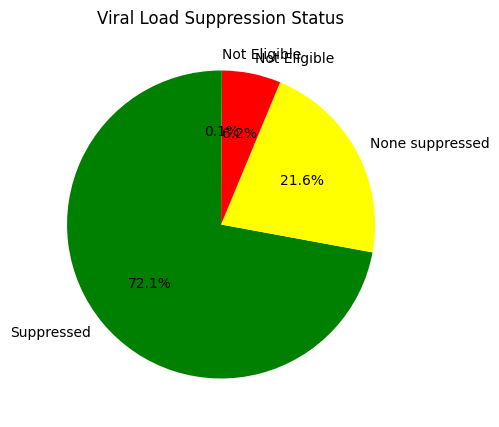

In [15]:
# VL Suppression
plt.figure(figsize=(8, 5))
vl_suppression_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'red'])
plt.title('Viral Load Suppression Status')
plt.ylabel('')
plt.show()

### Summary Table of Key Metrics: 
i calculated key metrics to provide an overview of the current status of the patient cohort in relation to treatment optimization and viral load updates. These metrics helped to summarized the health outcomes and program engagement levels of the children and adolescents living with HIV.

Below is the Python code used to develop the summary table of key metrics:

In [16]:
# Summary Table of Key Metrics ##

# Calculate key metrics
total_patients = len(data)
optimal_art_regimens = (data['optimization'] == 'Opt').sum()
vl_updated = (data['vl_updated_(y/n/ne)'] == 'y').sum()

# Create summary table
summary = {
    'Total Patients': total_patients,
    '% on Optimal ART Regimens': (optimal_art_regimens / total_patients) * 100,
    '% with VL Updated': (vl_updated / total_patients) * 100,
}

# Convert to DataFrame for display
summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
print(summary_df)

                      Metric        Value
0             Total Patients  1165.000000
1  % on Optimal ART Regimens    98.454936
2          % with VL Updated     0.000000


## 1.8 Key findings and Recommendations
### Key findings:
- ART Regimen Usage: Most children and adolescents living with HIV were on first-line ART, which indicated effectiveness, but the low usage of second and third-line regimens suggested potential under-monitoring or missed opportunities for regimen optimization.
- Viral Load Suppression: While many children and adolescents living with HIV showed successful viral load suppression, there were still some who were not suppressed, suggesting adherence or regimen effectiveness issues.
- Orphans adn Vulnerable Children Enrollment: There was a significant gap in enrolling eligible children in the OVC program, limiting support for vulnerable children and adolescents.

### Recommendations:
The recommendations made included the following:
- Improve on the Orphan and Vulnerable Children (OVC) program enrollment. This can be done by strengthening efforts to link eligible children and adolescents living with HIV to the OVC program through improved screening and outreach by community health workers.
- Optimize ART Regimens: Investigate and address barriers to ART optimization for children and adolescents not on the ideal regimens, ensuring timely switches and better patient education.
- Improve Viral Load Suppression: Focus on children and adolescents struggling with viral load suppression by identifying adherence barriers, exploring alternative treatments, and offering more personalized care.